In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
np.random.seed(100)

In [2]:
def failures(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        node = random.choice(G.nodes()) #select the node on the largest component
        G.remove_node(node) 
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0] 
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn


In [3]:
def most_connected(G): # This function is used to find the most connected node
    maxk = 0
    node = 0
    for i in G.nodes():
        if(G.degree(i) >= maxk):
            maxk = G.degree(i)
            node = i
    return node 

def attacks(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        node = most_connected(G) #select the most connected node on the largest component            
        G.remove_node(node) 
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0] 
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

In [28]:
def fcritical(G):
    def momment_of_degree_distribution2(G,m):
        M = 0
        N = len(G)
        for i in G.nodes():
            M = M + G.degree(i)**m
        M = M/N
        return M
    f = 1 - 1/(momment_of_degree_distribution2(G,2)/momment_of_degree_distribution2(G,1) - 1)
    return f

Number of nodes: 1174
Number of edges: 1417


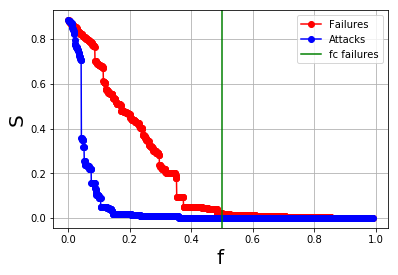

In [6]:
G= G=nx.read_edgelist("euroroad.txt", nodetype=int)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

fc = fcritical(G)

Sf, vnf = failures(G)
Sa, vna = attacks(G)

plt.figure()
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.show(); 


# ER Network

Number of nodes: 500
Number of edges: 523


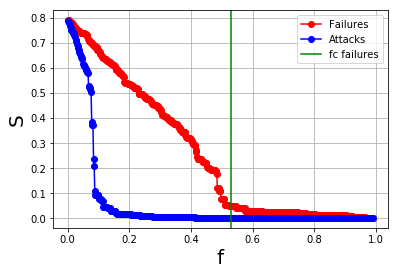

In [8]:
N = 500
av_degree = 2
p = av_degree/(N-1)
G = nx.gnp_random_graph(N, p, seed=None, directed=False)

N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

fc = fcritical(G)

Sf, vnf = failures(G)
Sa, vna = attacks(G)

plt.figure()
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.show(); 

# Small World Network

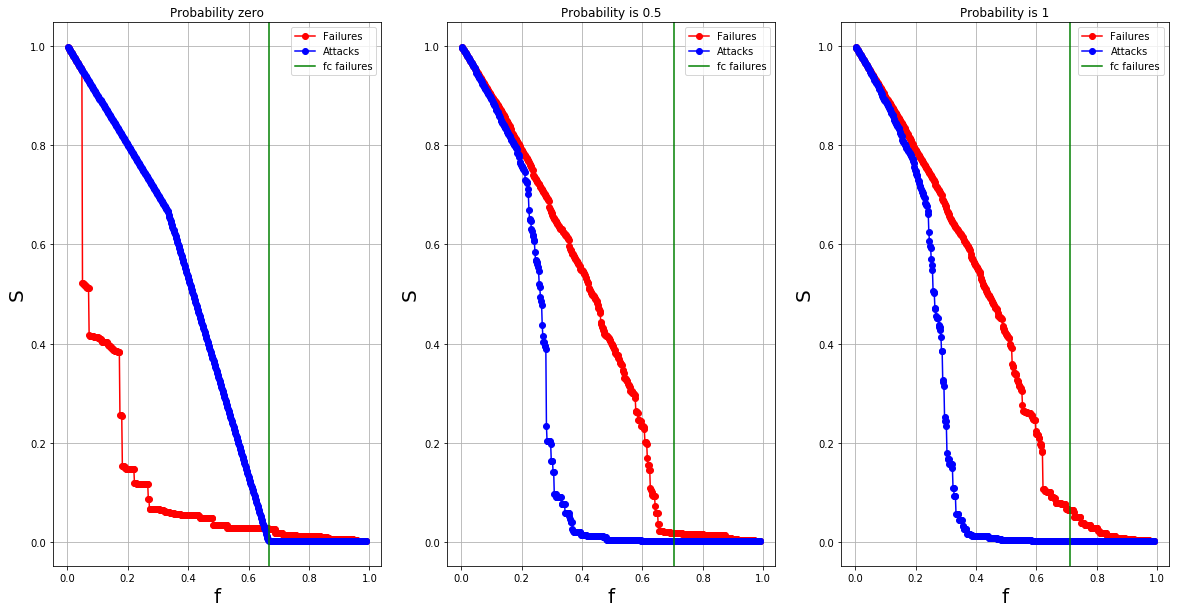

In [21]:
plt.figure(figsize=(20,10))
N = 500
av_degree = 8
k = int(av_degree/2)
p = 0 #probability of rewiring
G = nx.watts_strogatz_graph(N, k, p, seed=None)

N = len(G)
M = G.number_of_edges()
# print('Number of nodes:', N)
# print('Number of edges:', M)

fc = fcritical(G)

Sf, vnf = failures(G)
Sa, vna = attacks(G)

# plt.figure()
plt.subplot(1,3,1)
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.title('Probability zero')
# plt.show(); 


N = 500
av_degree = 8
k = int(av_degree/2)
p = 0.5 #probability of rewiring
G = nx.watts_strogatz_graph(N, k, p, seed=None)

N = len(G)
M = G.number_of_edges()
# print('Number of nodes:', N)
# print('Number of edges:', M)

fc = fcritical(G)

Sf, vnf = failures(G)
Sa, vna = attacks(G)

# plt.figure()
plt.subplot(1,3,2)
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.title('Probability is 0.5')


N = 500
av_degree = 8
k = int(av_degree/2)
p = 1 #probability of rewiring
G = nx.watts_strogatz_graph(N, k, p, seed=None)

N = len(G)
M = G.number_of_edges()
# print('Number of nodes:', N)
# print('Number of edges:', M)

fc = fcritical(G)

Sf, vnf = failures(G)
Sa, vna = attacks(G)

# plt.figure()
plt.subplot(1,3,3)
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.title('Probability is 1')
plt.show(); 

# Barabasi Albert

Number of nodes: 500
Number of edges: 2475


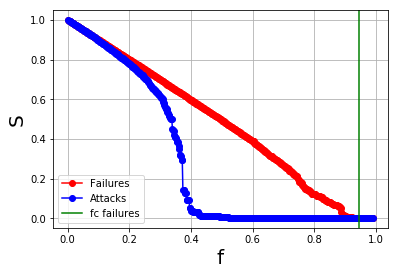

In [24]:
N = 500
av_degree = 10
m = int(av_degree/2)
G = nx.barabasi_albert_graph(N, m)

N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

fc = fcritical(G)

Sf, vnf = failures(G)
Sa, vna = attacks(G)

plt.figure()
plt.plot(vnf,Sf,'-or', label='Failures')
plt.plot(vna,Sa,'-ob', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend()
plt.grid(True)
plt.show(); 

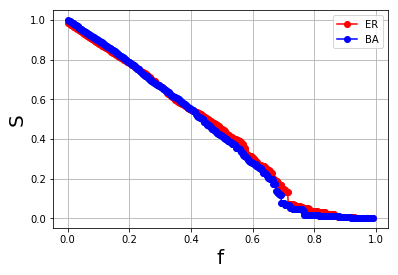

In [25]:


N = 500
av_degree = 4
p = av_degree/(N-1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

SER, vnER = failures(GER)
SBA, vnBA = failures(GBA)
plt.figure()
plt.plot(vnER,SER,'-or', label='ER')
plt.plot(vnBA,SBA,'-ob', label='BA')
plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 



# Cascade

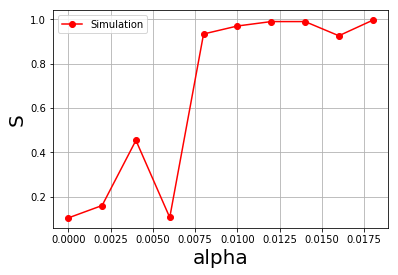

[0.104, 0.16, 0.454, 0.106, 0.934, 0.97, 0.99, 0.99, 0.926, 0.996]
[0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018000000000000002]


In [26]:
N = 500
av_degree = 10
#p = av_degree/(N-1)
#G0 = nx.gnp_random_graph(N, p, seed=None, directed=False)
m = int(av_degree/2)
G0 = nx.barabasi_albert_graph(N, m)

vs = [] #stores the size of the largest component
valpha = [] #stores the values of alpha
for alpha in arange(0,0.02, 0.002):
    G = G0.copy() # we have to return to the original graph for each value of alpha
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    n0=len(Gcc[0]) # largest component at step t
    n1 = -1 # largest component at step (t+1)
    C0 = nx.betweenness_centrality(G) # inital capacity of each node
    for i in G.nodes():
        C0[i] = C0[i]*(1 + alpha)
    #start the process by removing the first node
    node = random.choice(G.nodes()) #starting node
    G.remove_node(node)
    while(n1 < n0):
        C = nx.betweenness_centrality(G)
        removed = []
        for i in G.nodes():
            if(C0[i] < C[i]):
                removed.append(i)
        for i in removed:
            G.remove_node(i)
        n0 = n1
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        n1=len(Gcc[0])
    #size of the largest component after the cascade of removals
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    n1=len(Gcc[0])
    vs.append(n1/len(G0))
    valpha.append(alpha)
    
plt.figure()
plt.plot(valpha,vs,'-or', label='Simulation')
plt.legend()
plt.xlabel("alpha", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 
print(vs)
print(valpha)

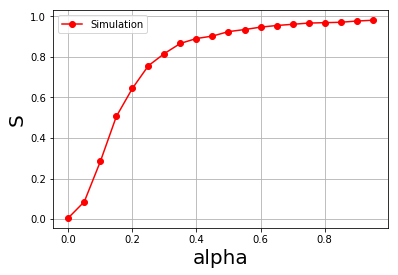

In [64]:

N = 500
av_degree = 10
#p = av_degree/(N-1)
#G0 = nx.gnp_random_graph(N, p, seed=None, directed=False)
m = int(av_degree/2)
G0 = nx.barabasi_albert_graph(N, m)

#Could selected the most central, the one with the highest centrality or closed centrality 
def most_connected(G):    
    maxk = 0
    node = 0
    for i in G.nodes():
        if(G.degree(i) > maxk):
            maxk = G.degree(i) # could change tis line to between centrality or close centrality
            node = i
    return node 
# print(G.nodes())
def Between_centrality(G):    
    maxk = 0
    node = 0
    B = (nx.betweenness_centrality(G))
    for i in G.nodes():
#         print(i)
        if(B[i] >= maxk):
            maxk = B[i]# could change tis line to between centrality or close centrality
            node = i
    return node 

def close_centrality(G):
    maxk = 0
    node = 0 
    B = nx.closeness_centrality(G)
    for i in G.nodes():
        if (B[i] >= maxk):
            maxk = B[i]
            node = i
    return node 

# print(Between_centrality(G0))

vs = [] #stores the size of the largest component
valpha = [] #stores the values of alpha
for alpha in arange(0,1, 0.05):
    G = G0.copy() # we have to return to the original graph for each value of alpha
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    n0=len(Gcc[0]) # largest component at step t
    n1 = -1 # largest component at step (t+1)
    C0 = nx.betweenness_centrality(G) # inital capacity of each node
    for i in G.nodes():
        C0[i] = C0[i]*(1 + alpha)
    #start the process by removing the first node
#     node = most_connected(G)
    node = close_centrality(G)
#     node = Between_centrality(G)
    G.remove_node(node)
    while(n1 < n0):
        C = nx.betweenness_centrality(G)
        removed = []
        for i in G.nodes():
            if(C0[i] < C[i]):
                removed.append(i)
        for i in removed:
            G.remove_node(i)
        n0 = n1
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        n1=len(Gcc[0])
    #size of the largest component after the cascade of removals
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    n1=len(Gcc[0])
    vs.append(n1/len(G0))
    valpha.append(alpha)
    
plt.figure()
plt.plot(valpha,vs,'-or', label='Simulation')
plt.legend()
plt.xlabel("alpha", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 


In [59]:
N = 10
av_degree = 10
#p = av_degree/(N-1)
#G0 = nx.gnp_random_graph(N, p, seed=None, directed=False)
m = int(av_degree/2)
G = nx.barabasi_albert_graph(N, m)

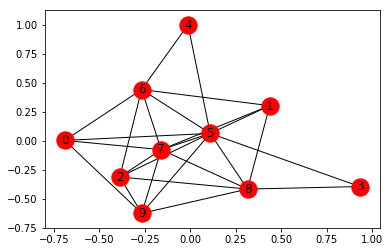

In [60]:
nx.draw_networkx(G)